In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
data= pd.read_csv('MLPX.csv')

data.head()
#data.rename(columns={'POWER':'Power'},inplace=True)
#data.rename(columns={'SCAN SPEED(MM/S)':'Scan Speed'},inplace=True)
#data.rename(columns={'SPOT SIZE(UM)':'Spot Size'},inplace=True)


,MODE,Power,Scan Speed,SPOT SIZE(UM),Thickness,Ref
0,0,200,1000,55,75,17
1,0,300,1500,55,75,17
2,1,400,2000,55,75,17
3,0,100,300,55,75,17
4,0,200,600,55,75,17


In [3]:
# Dropping The Reference Coloumn
col=['Ref']
data1=data.drop(col,axis=1)


In [4]:
# Data Set Description
data1.describe()

,MODE,Power,Scan Speed,SPOT SIZE(UM),Thickness
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.520000,221.240000,849.760000,67.390000,52.950000
std,0.502117,108.610333,711.957624,18.808388,18.231051
min,0.000000,50.000000,100.000000,52.000000,20.000000
25%,0.000000,150.000000,300.000000,55.000000,50.000000
50%,1.000000,200.000000,600.000000,55.000000,50.000000
75%,1.000000,300.000000,1025.000000,70.000000,75.000000
max,1.000000,500.000000,3000.000000,130.000000,75.000000


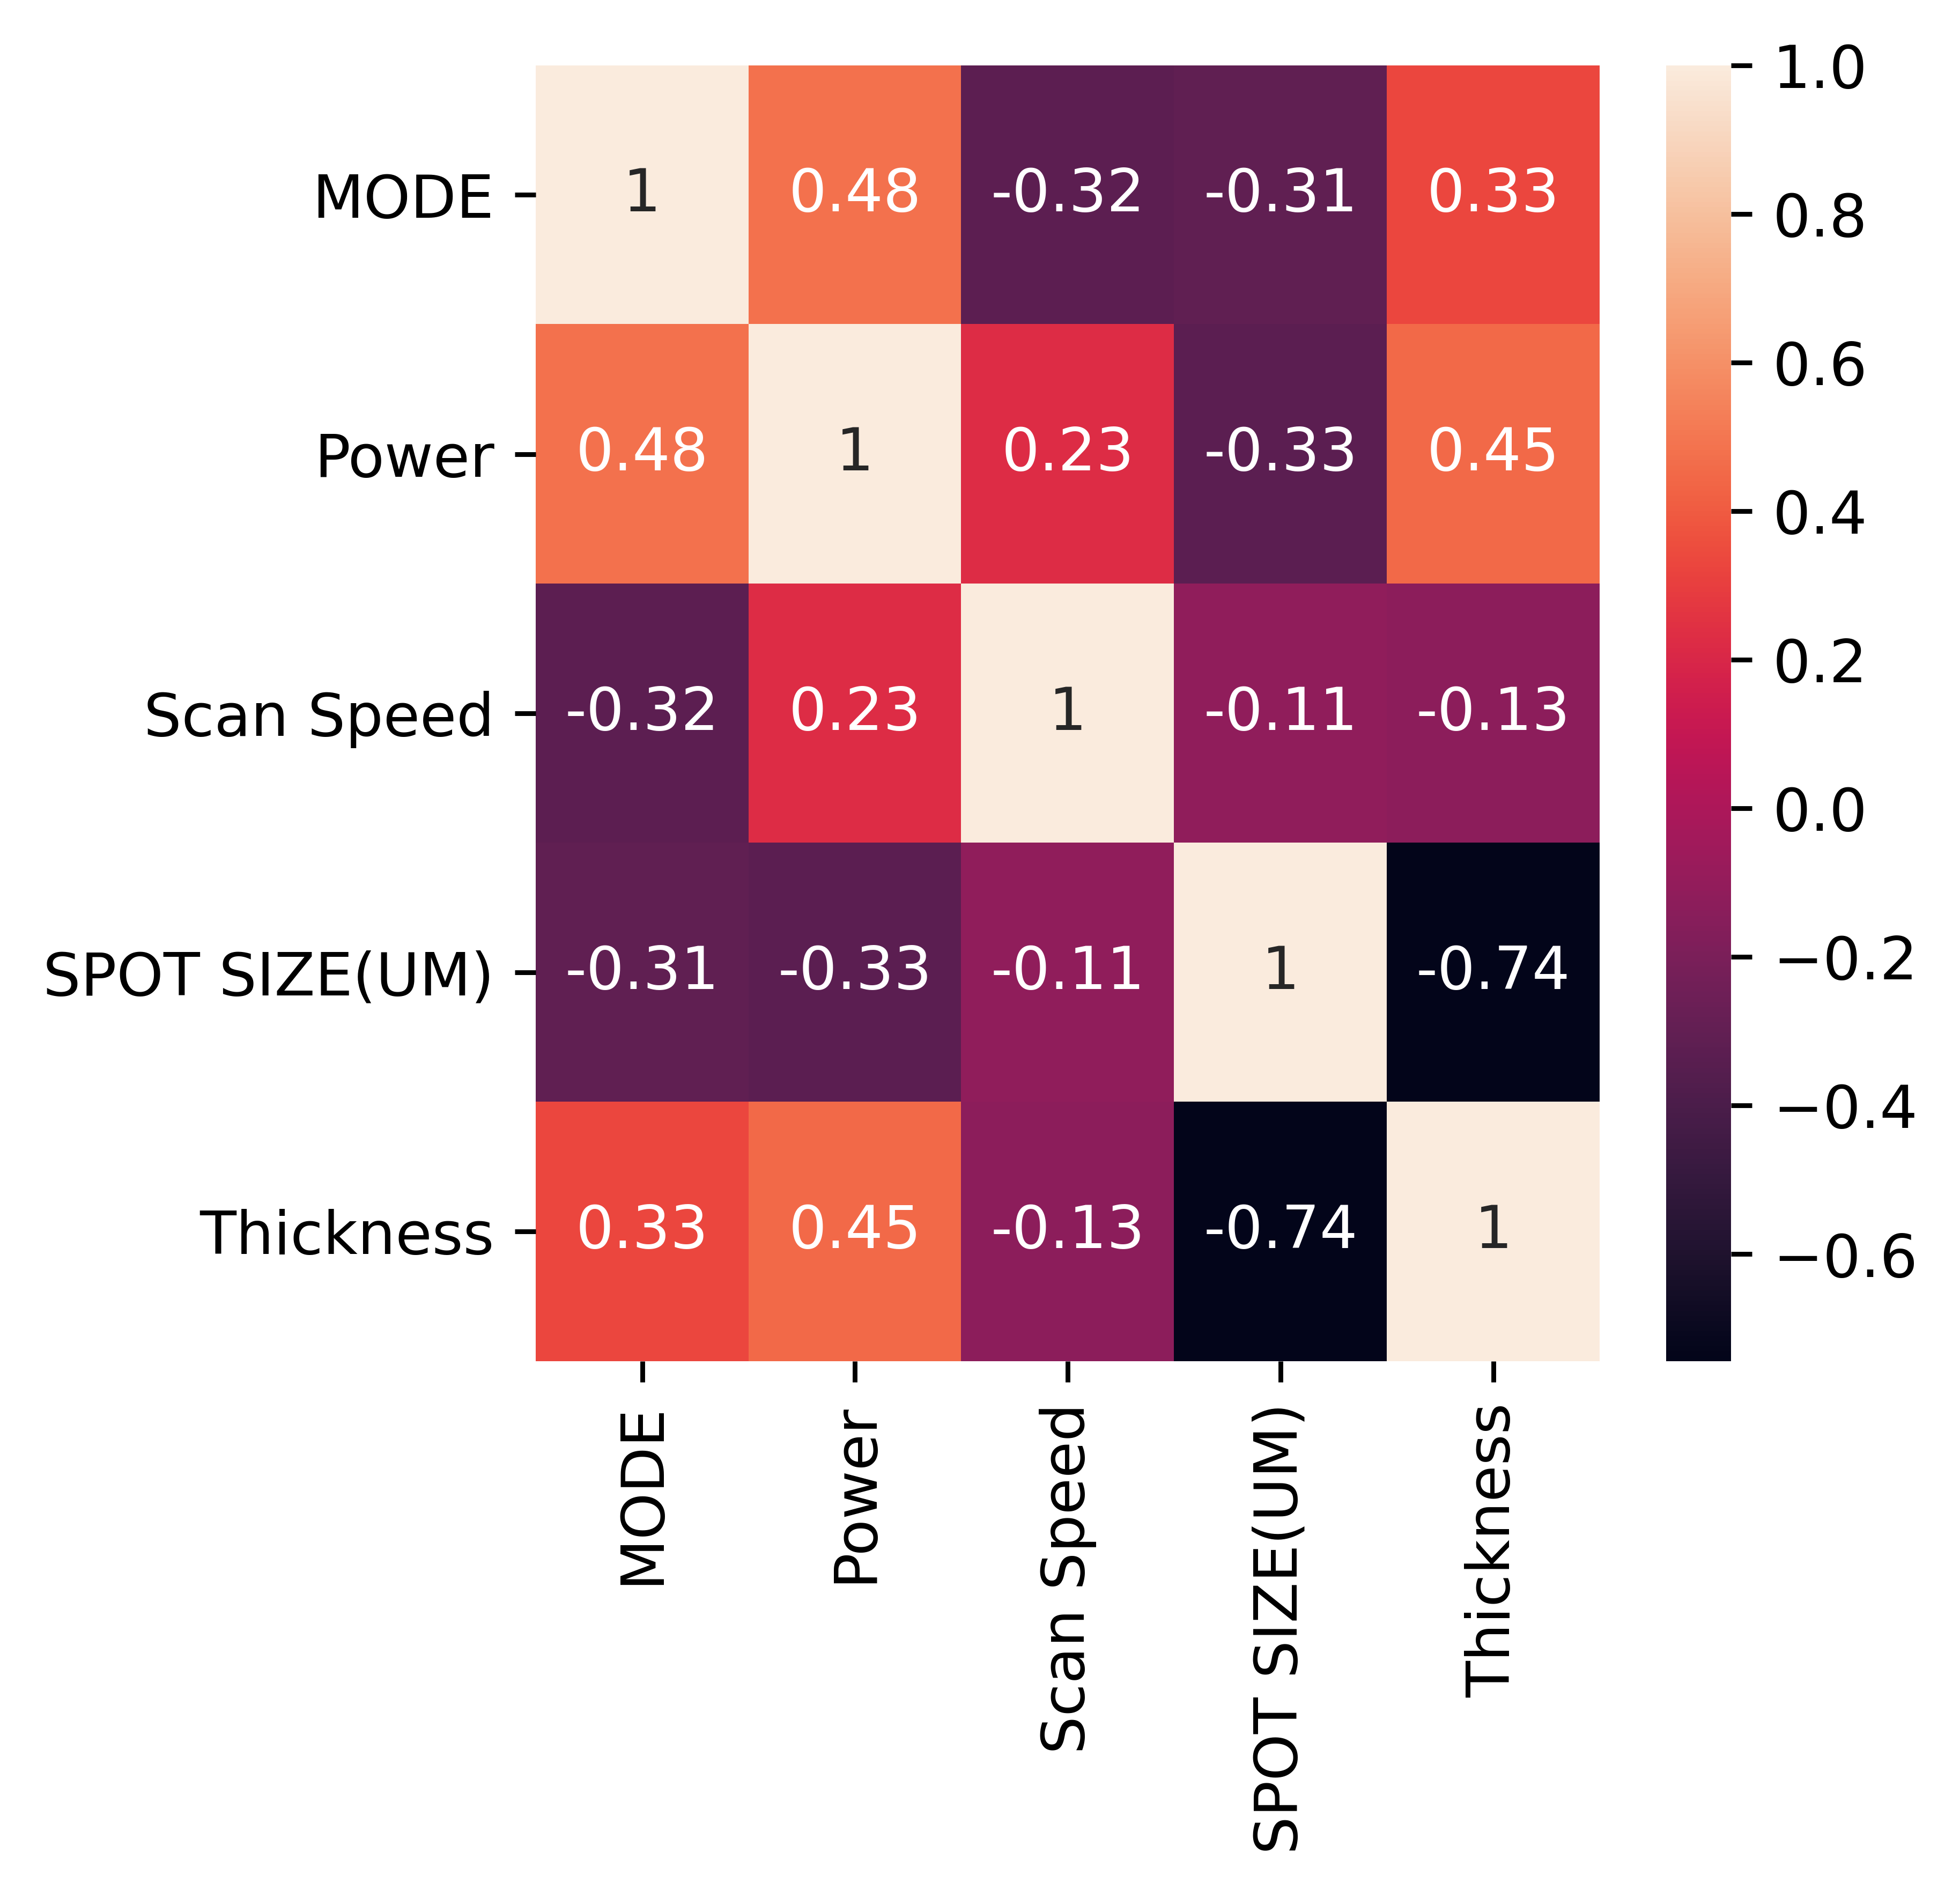

In [5]:
# Corelation Matrix
plt.figure(figsize=(4,4),dpi=800)
sns.heatmap(data1.corr(),annot=True);

In [6]:
from scipy import stats

In [7]:
# Separating input and output features
x = data1.loc[:, data1.columns != 'MODE']  # independent variables

y = data1.loc[:, data1.columns == 'MODE'] 

# Test Train Split
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.2,random_state=70)



In [8]:
# Testing the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
regm= RandomForestClassifier(n_estimators=1000,random_state=0)
regm.fit(xtr,ytr)

<ipython-input-8-2d68de6f9b07>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm.fit(xtr,ytr)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [9]:
regm.score(xtr,ytr)

0.9875

In [10]:
regm.predict(xte)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [11]:
regm.score(xte,yte)

0.8

In [12]:
regm.feature_importances_

array([0.32010217, 0.48990756, 0.12664408, 0.06334619])

<function matplotlib.pyplot.show(close=None, block=None)>

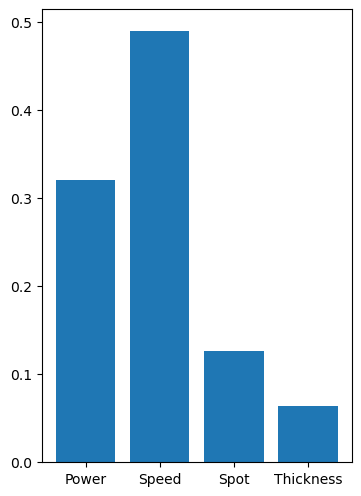

In [13]:
plt.figure(figsize=(4,6),dpi=100)
z=["Power","Speed","Spot","Thickness"]
plt.bar(z,regm.feature_importances_)
plt.show

In [14]:
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

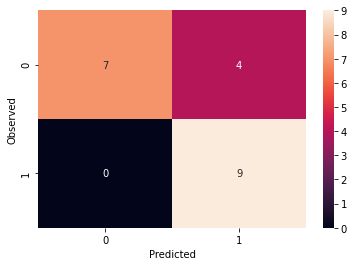

In [15]:
draw_cm(yte,regm.predict(xte));

<ipython-input-16-7a385f45ddce>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-7a385f45ddce>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-7a385f45ddce>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-7a385f45ddce>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-7a385f45ddce>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

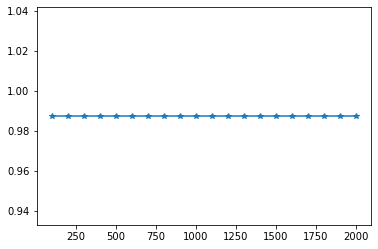

In [16]:
# Random Forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import mean_squared_error
ar=np.zeros(20)
ar1=np.linspace(100,2000,20)
scr=np.zeros(20)
scr1=np.zeros(20)
for i in range(20):
    regm1= RandomForestClassifier(n_estimators=int(ar1[i]),random_state=0)
    regm1.fit(xtr,ytr)
    scr[i]=accuracy_score(ytr,regm1.predict(xtr))
    ypr1=regm1.predict(xtr)
    scr1[i]=recall_score(ytr,ypr1)
plt.plot(ar1,scr,marker='*')

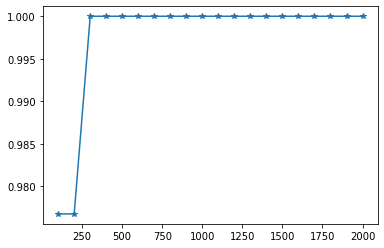

In [17]:
plt.plot(ar1,scr1,marker='*')

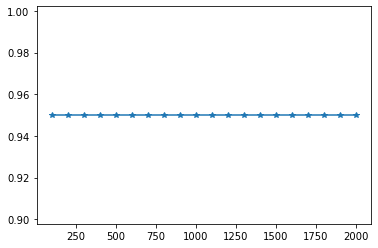

In [18]:
# XGBoost with Hyperparameter Tuning
!pip install xgboost 
from xgboost import XGBClassifier
a=np.zeros(20)
a1=np.linspace(100,2000,20)
scxg=np.zeros(20)
sc1xg=np.zeros(20)
for i in range(20):
    xgb = XGBClassifier(random_state=1,n_estimators=int(a1[i]))
    xgb.fit(xtr,ytr)
    scxg[i]=accuracy_score(ytr,xgb.predict(xtr))
    yp1=xgb.predict(xtr)
    sc1xg[i]=recall_score(ytr,yp1)
plt.plot(a1,scxg,marker='*')

 

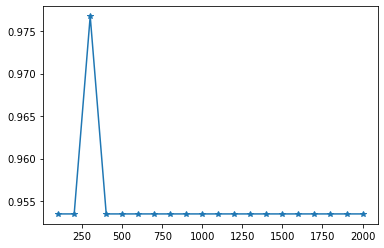

In [19]:
plt.plot(a1,sc1xg,marker='*')

In [20]:
!pip install xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1,n_estimators=1250)
xgb.fit(xtr,ytr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
xgb.score(xtr,ytr)

0.95

In [22]:
xgb.predict(xte)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [23]:
xgb.score(xte,yte)

0.85

In [24]:
xgb.feature_importances_

array([0.27687436, 0.49034664, 0.21986358, 0.01291544], dtype=float32)

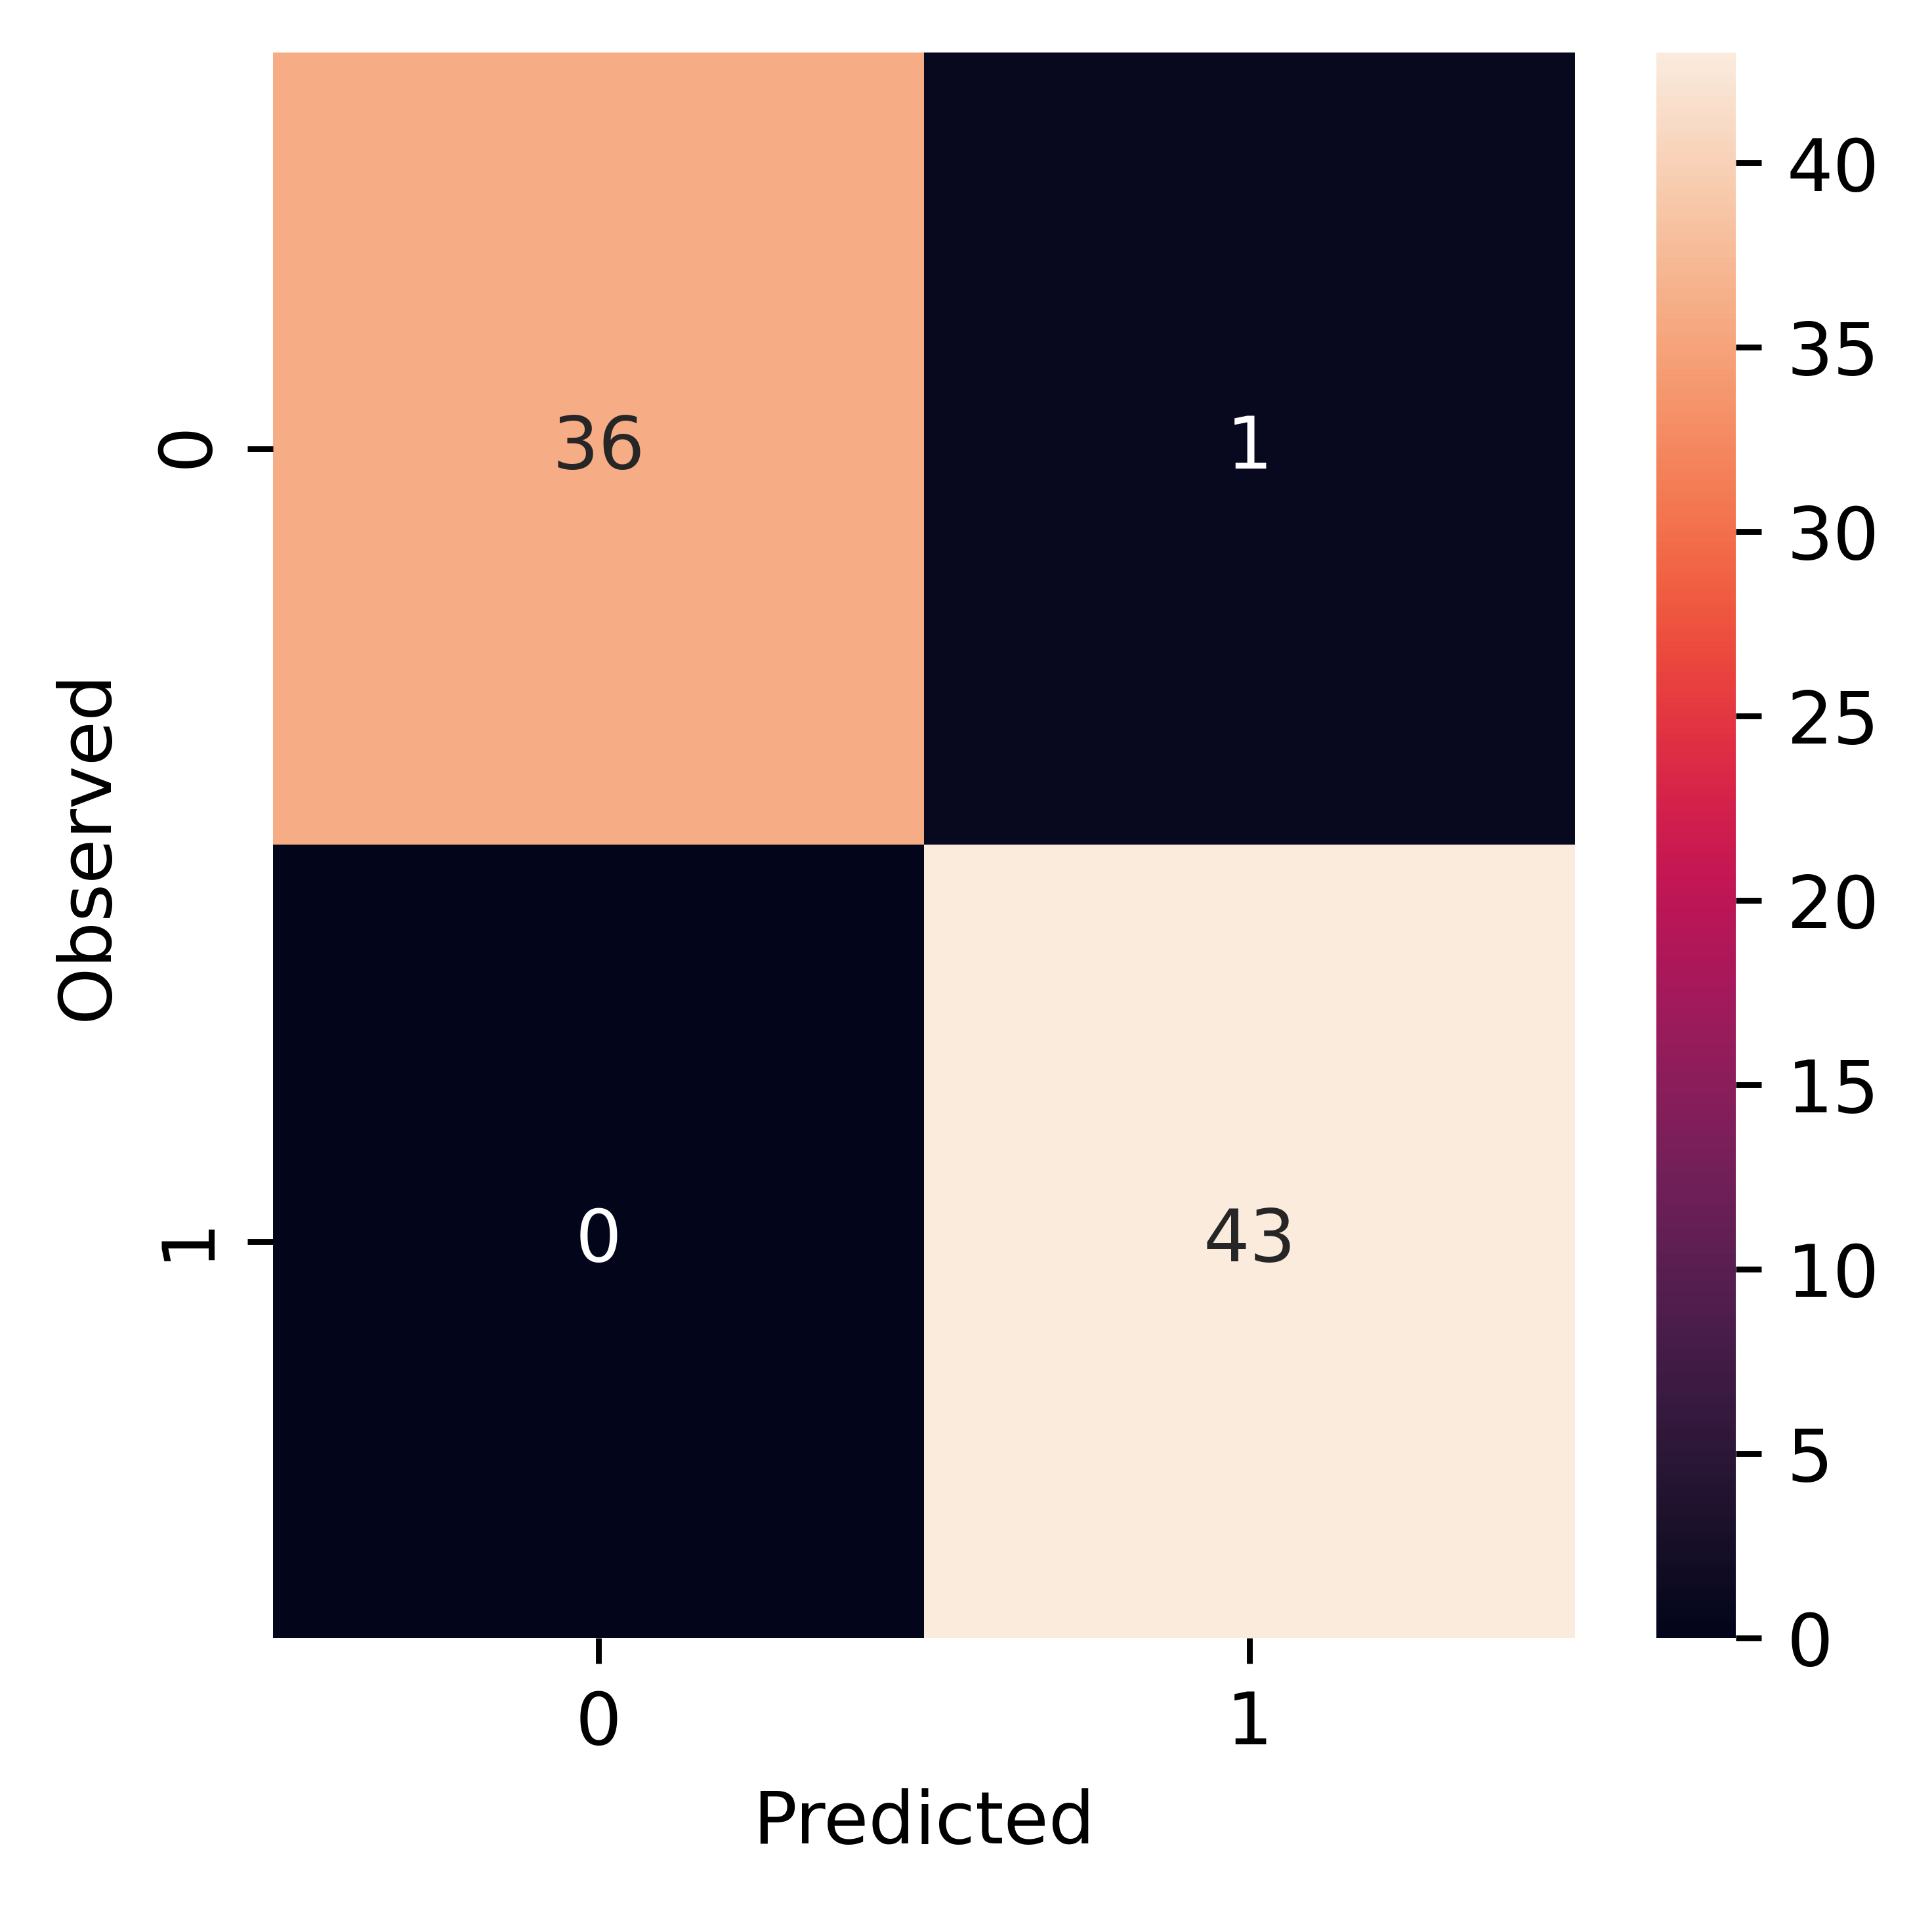

In [25]:
# Confusion Matrix for RF Training Data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,regm.predict(xtr));

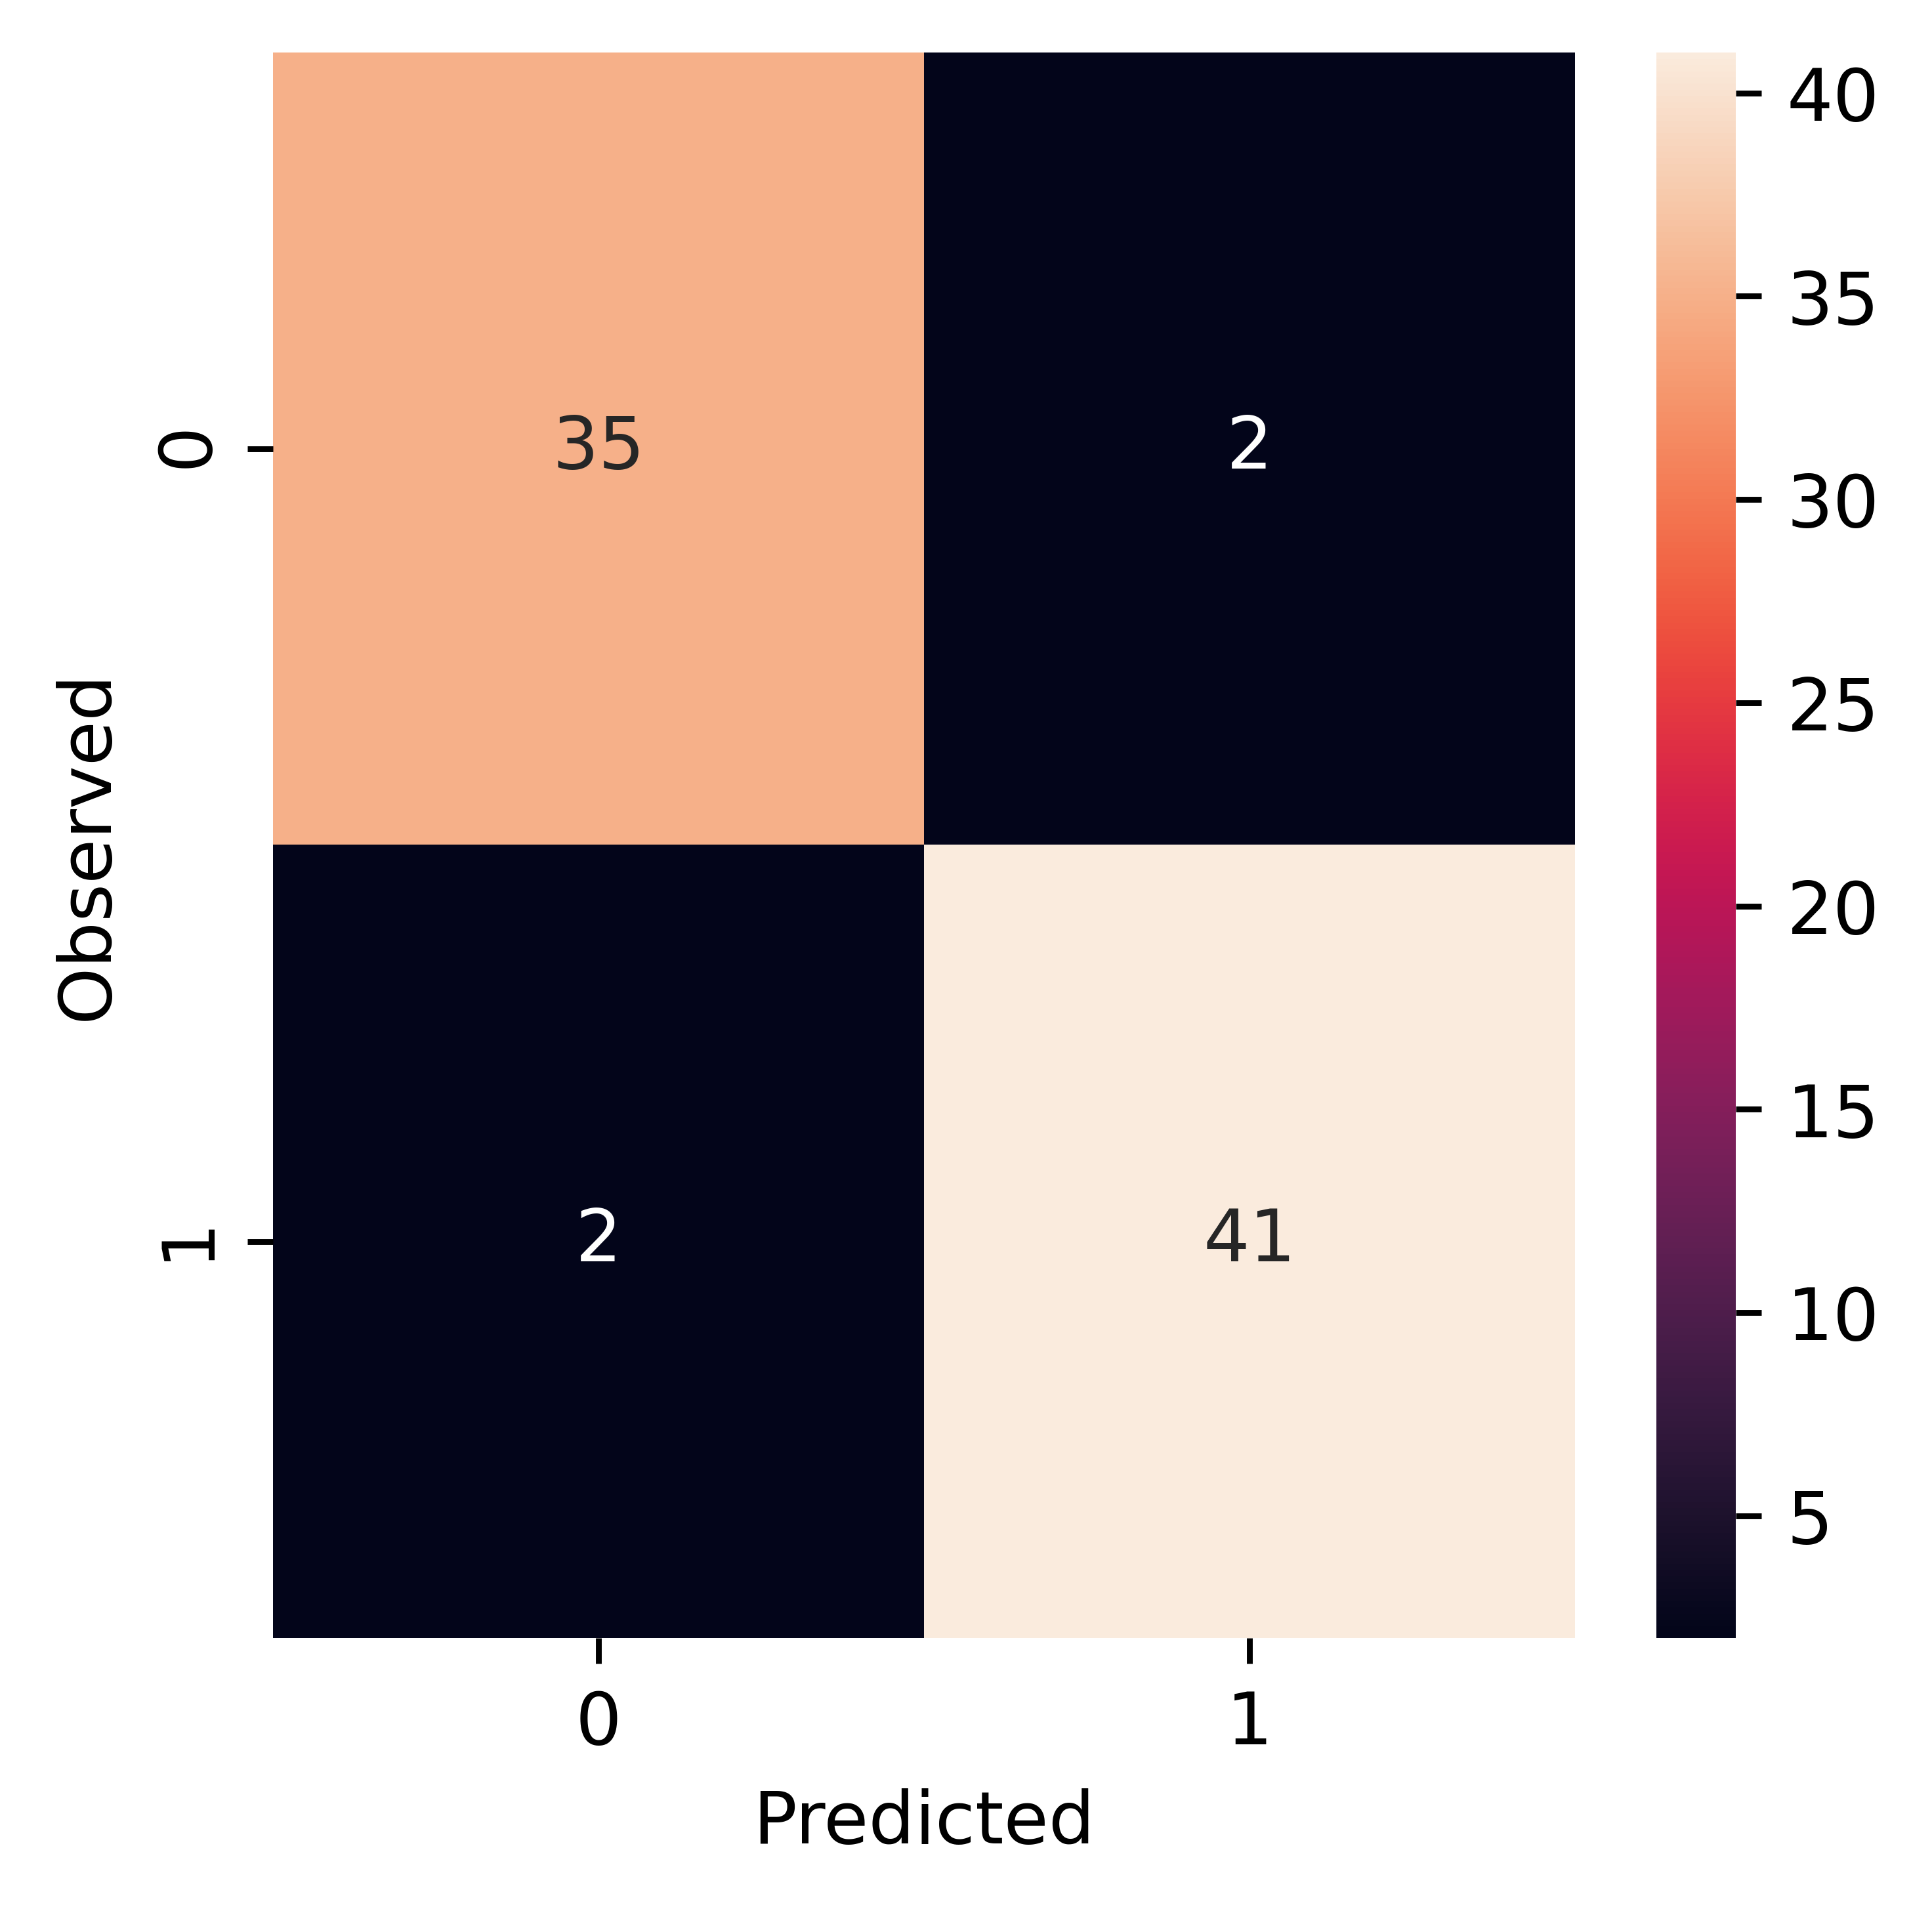

In [26]:
# Confusion Matrix for XGBoost Training data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,xgb.predict(xtr));

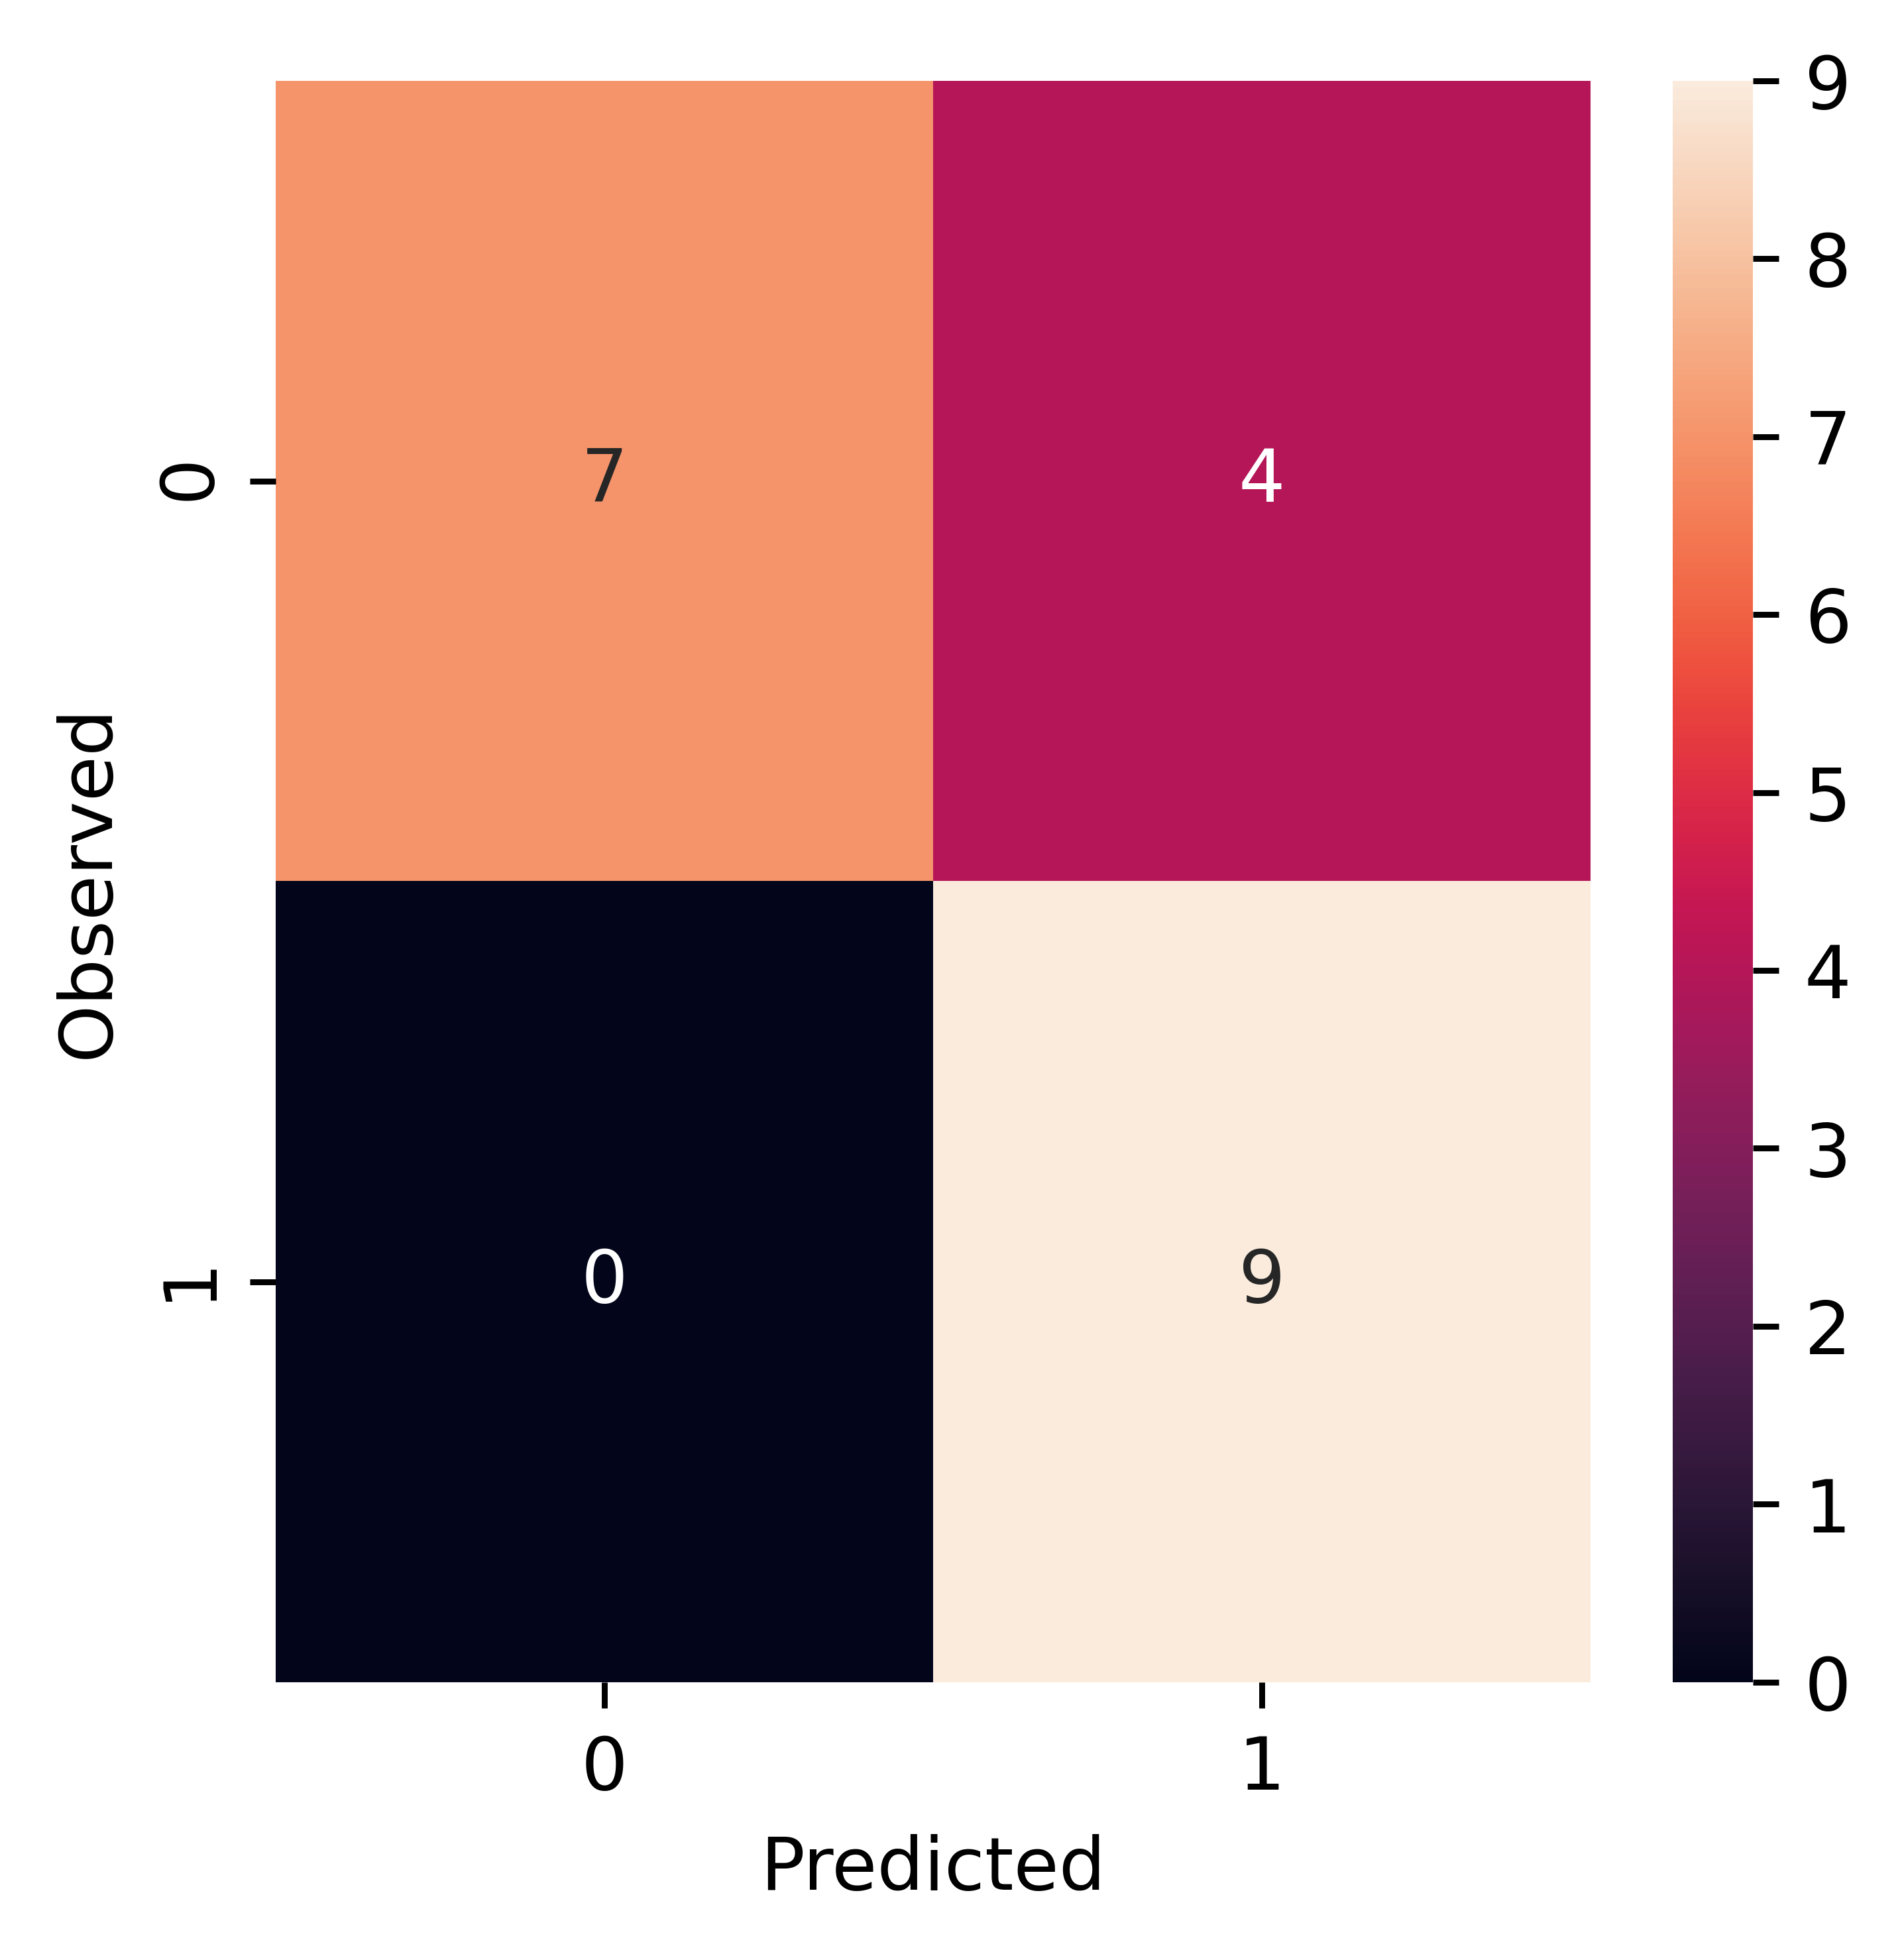

In [27]:
# Confusion Matrix for RF Test Data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,regm.predict(xte));

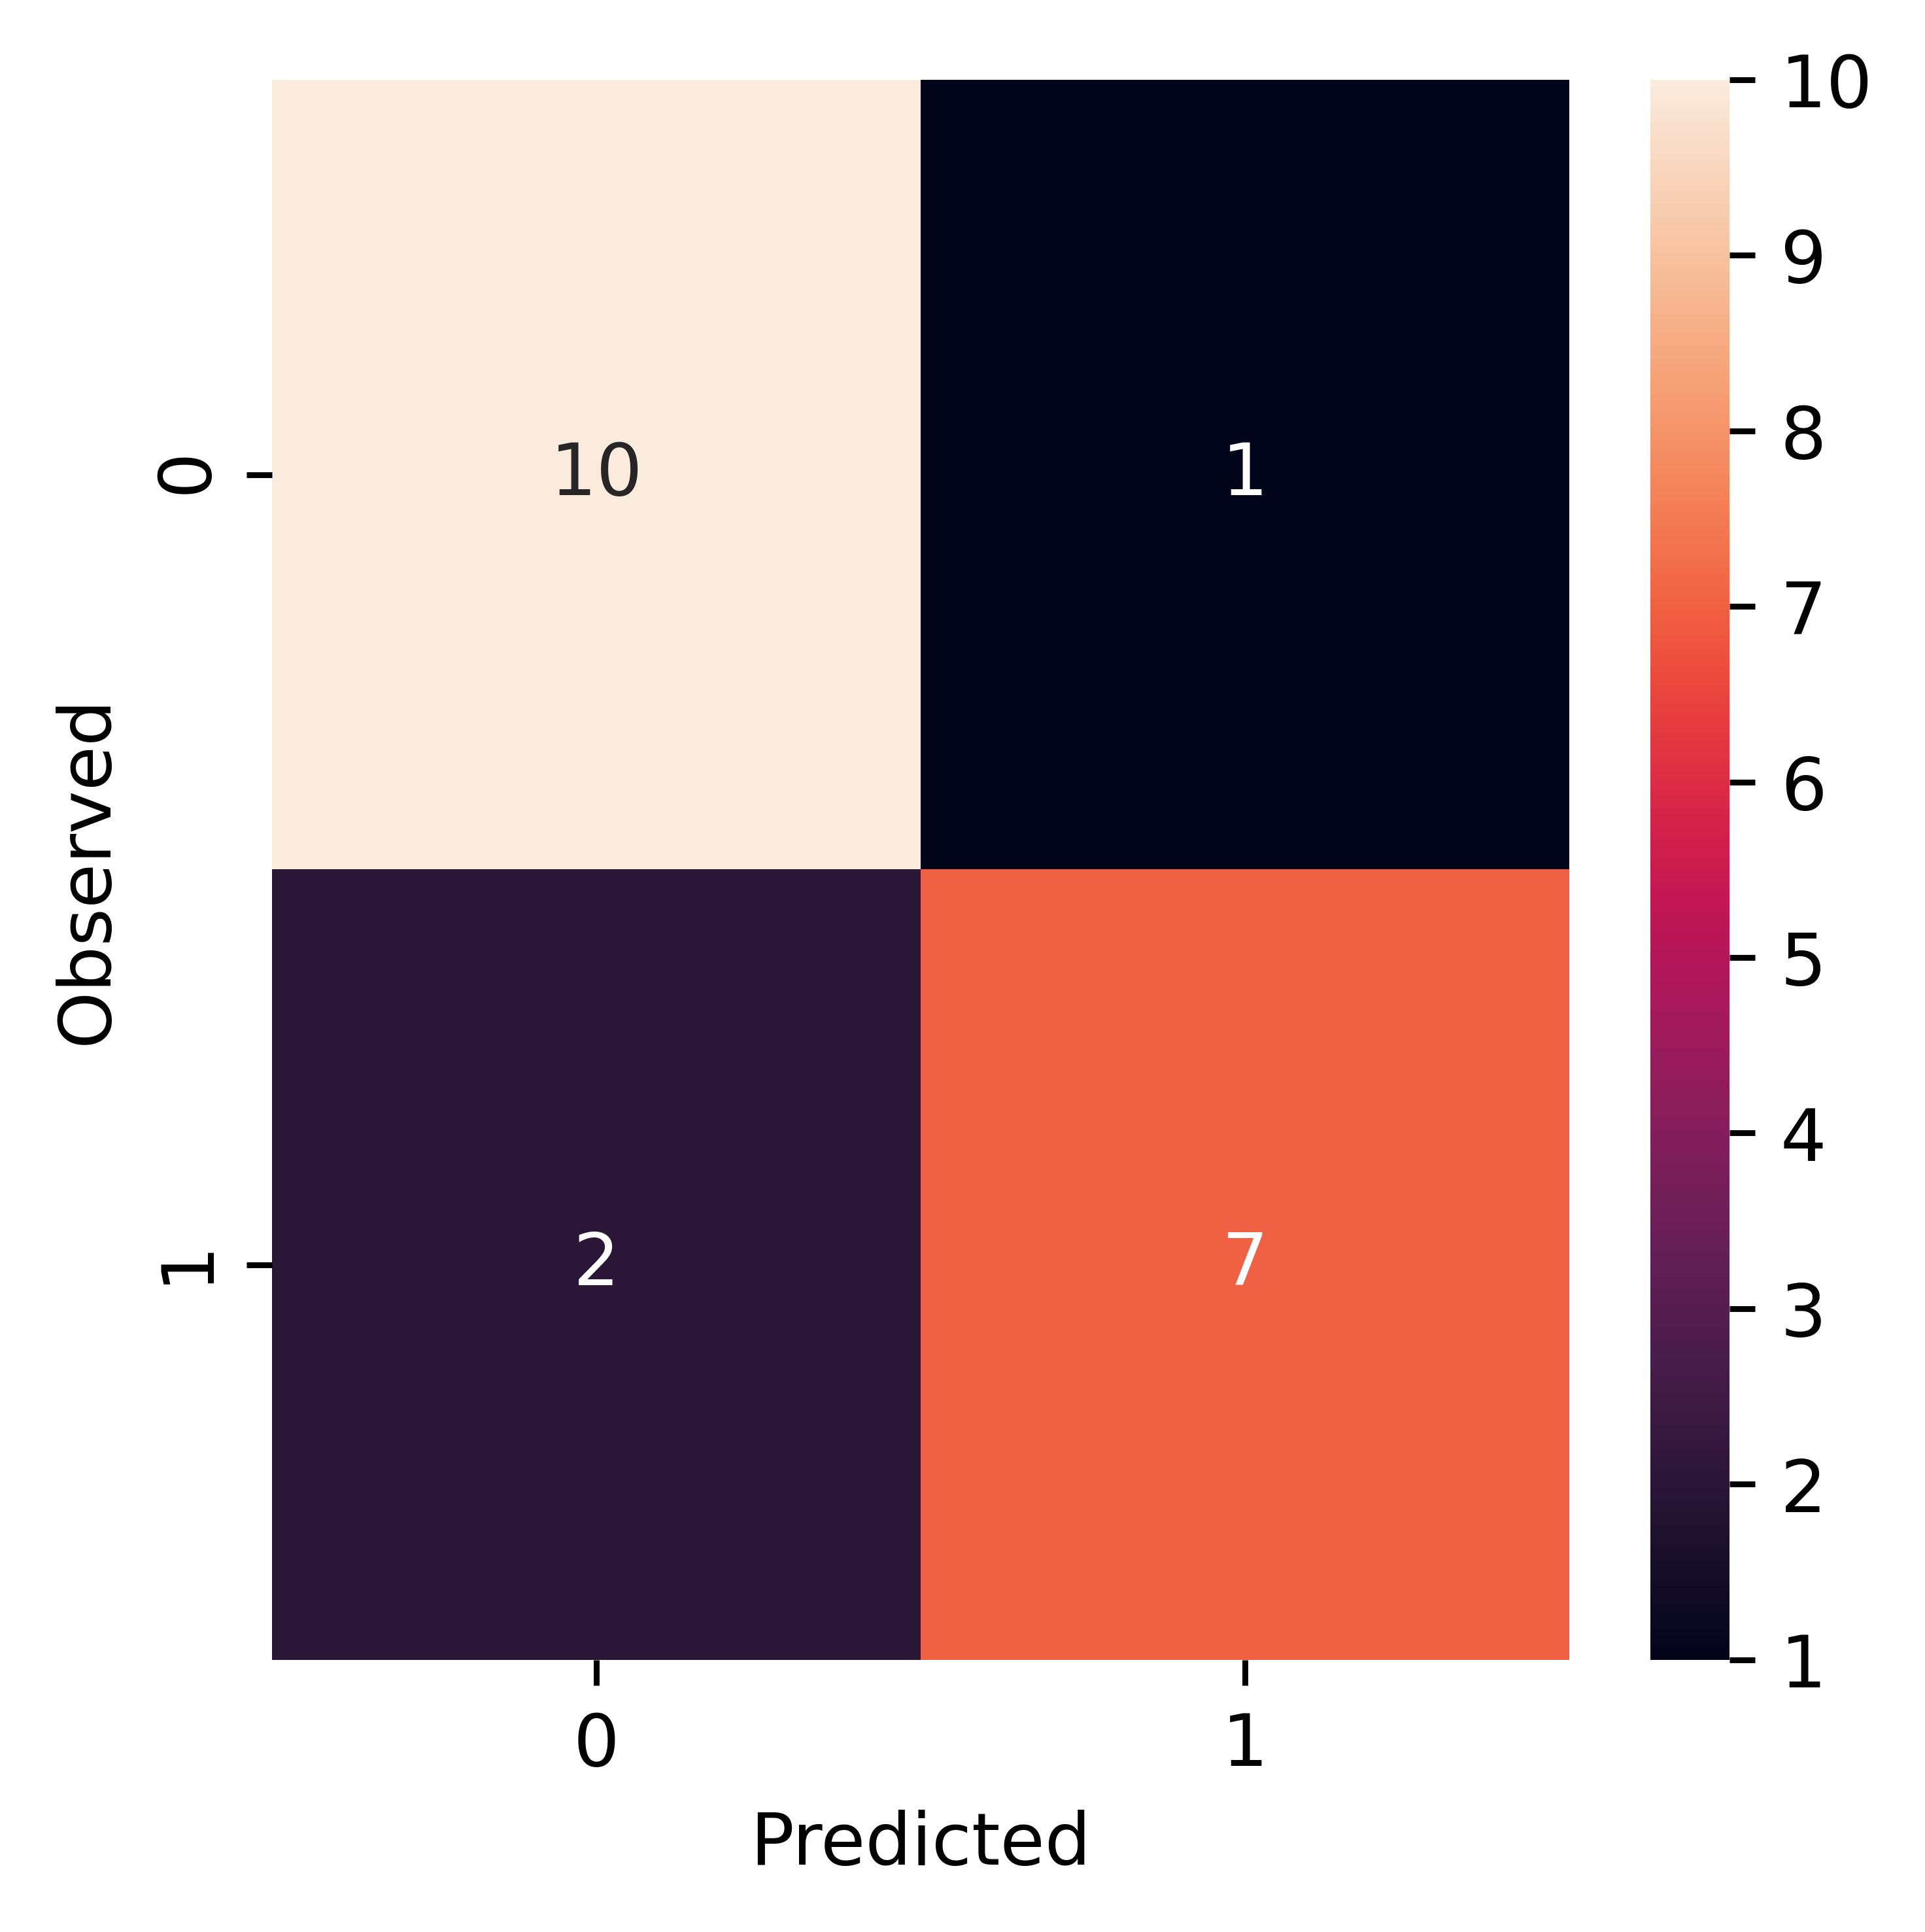

In [28]:
# Confusion Matrix for XGBoost Test data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,xgb.predict(xte));

In [29]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score
print(accuracy_score(ytr,regm.predict(xtr)))
print(accuracy_score(yte,regm.predict(xte)))
print(accuracy_score(ytr,xgb.predict(xtr)))
print(accuracy_score(yte,xgb.predict(xte)))


0.9875
0.8
0.95
0.85


In [30]:
print(recall_score(ytr,regm.predict(xtr)))
print(recall_score(yte,regm.predict(xte)))
print(recall_score(ytr,xgb.predict(xtr)))
print(recall_score(yte,xgb.predict(xte)))

1.0
1.0
0.9534883720930233
0.7777777777777778


In [31]:
print(f1_score(ytr,regm.predict(xtr)))
print(f1_score(yte,regm.predict(xte)))
print(f1_score(ytr,xgb.predict(xtr)))
print(f1_score(yte,xgb.predict(xte)))

0.9885057471264368
0.8181818181818181
0.9534883720930233
0.823529411764706


In [32]:
print(precision_score(ytr,regm.predict(xtr)))
print(precision_score(yte,regm.predict(xte)))
print(precision_score(ytr,xgb.predict(xtr)))
print(precision_score(yte,xgb.predict(xte)))

0.9772727272727273
0.6923076923076923
0.9534883720930233
0.875


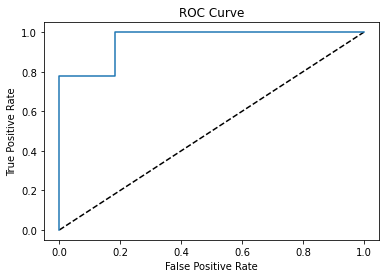

In [33]:
y_pred_prob=regm1.predict_proba(xte)
fpr, tpr, thresholds =roc_curve(yte, y_pred_prob[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<AxesSubplot:xlabel='MODE', ylabel='count'>

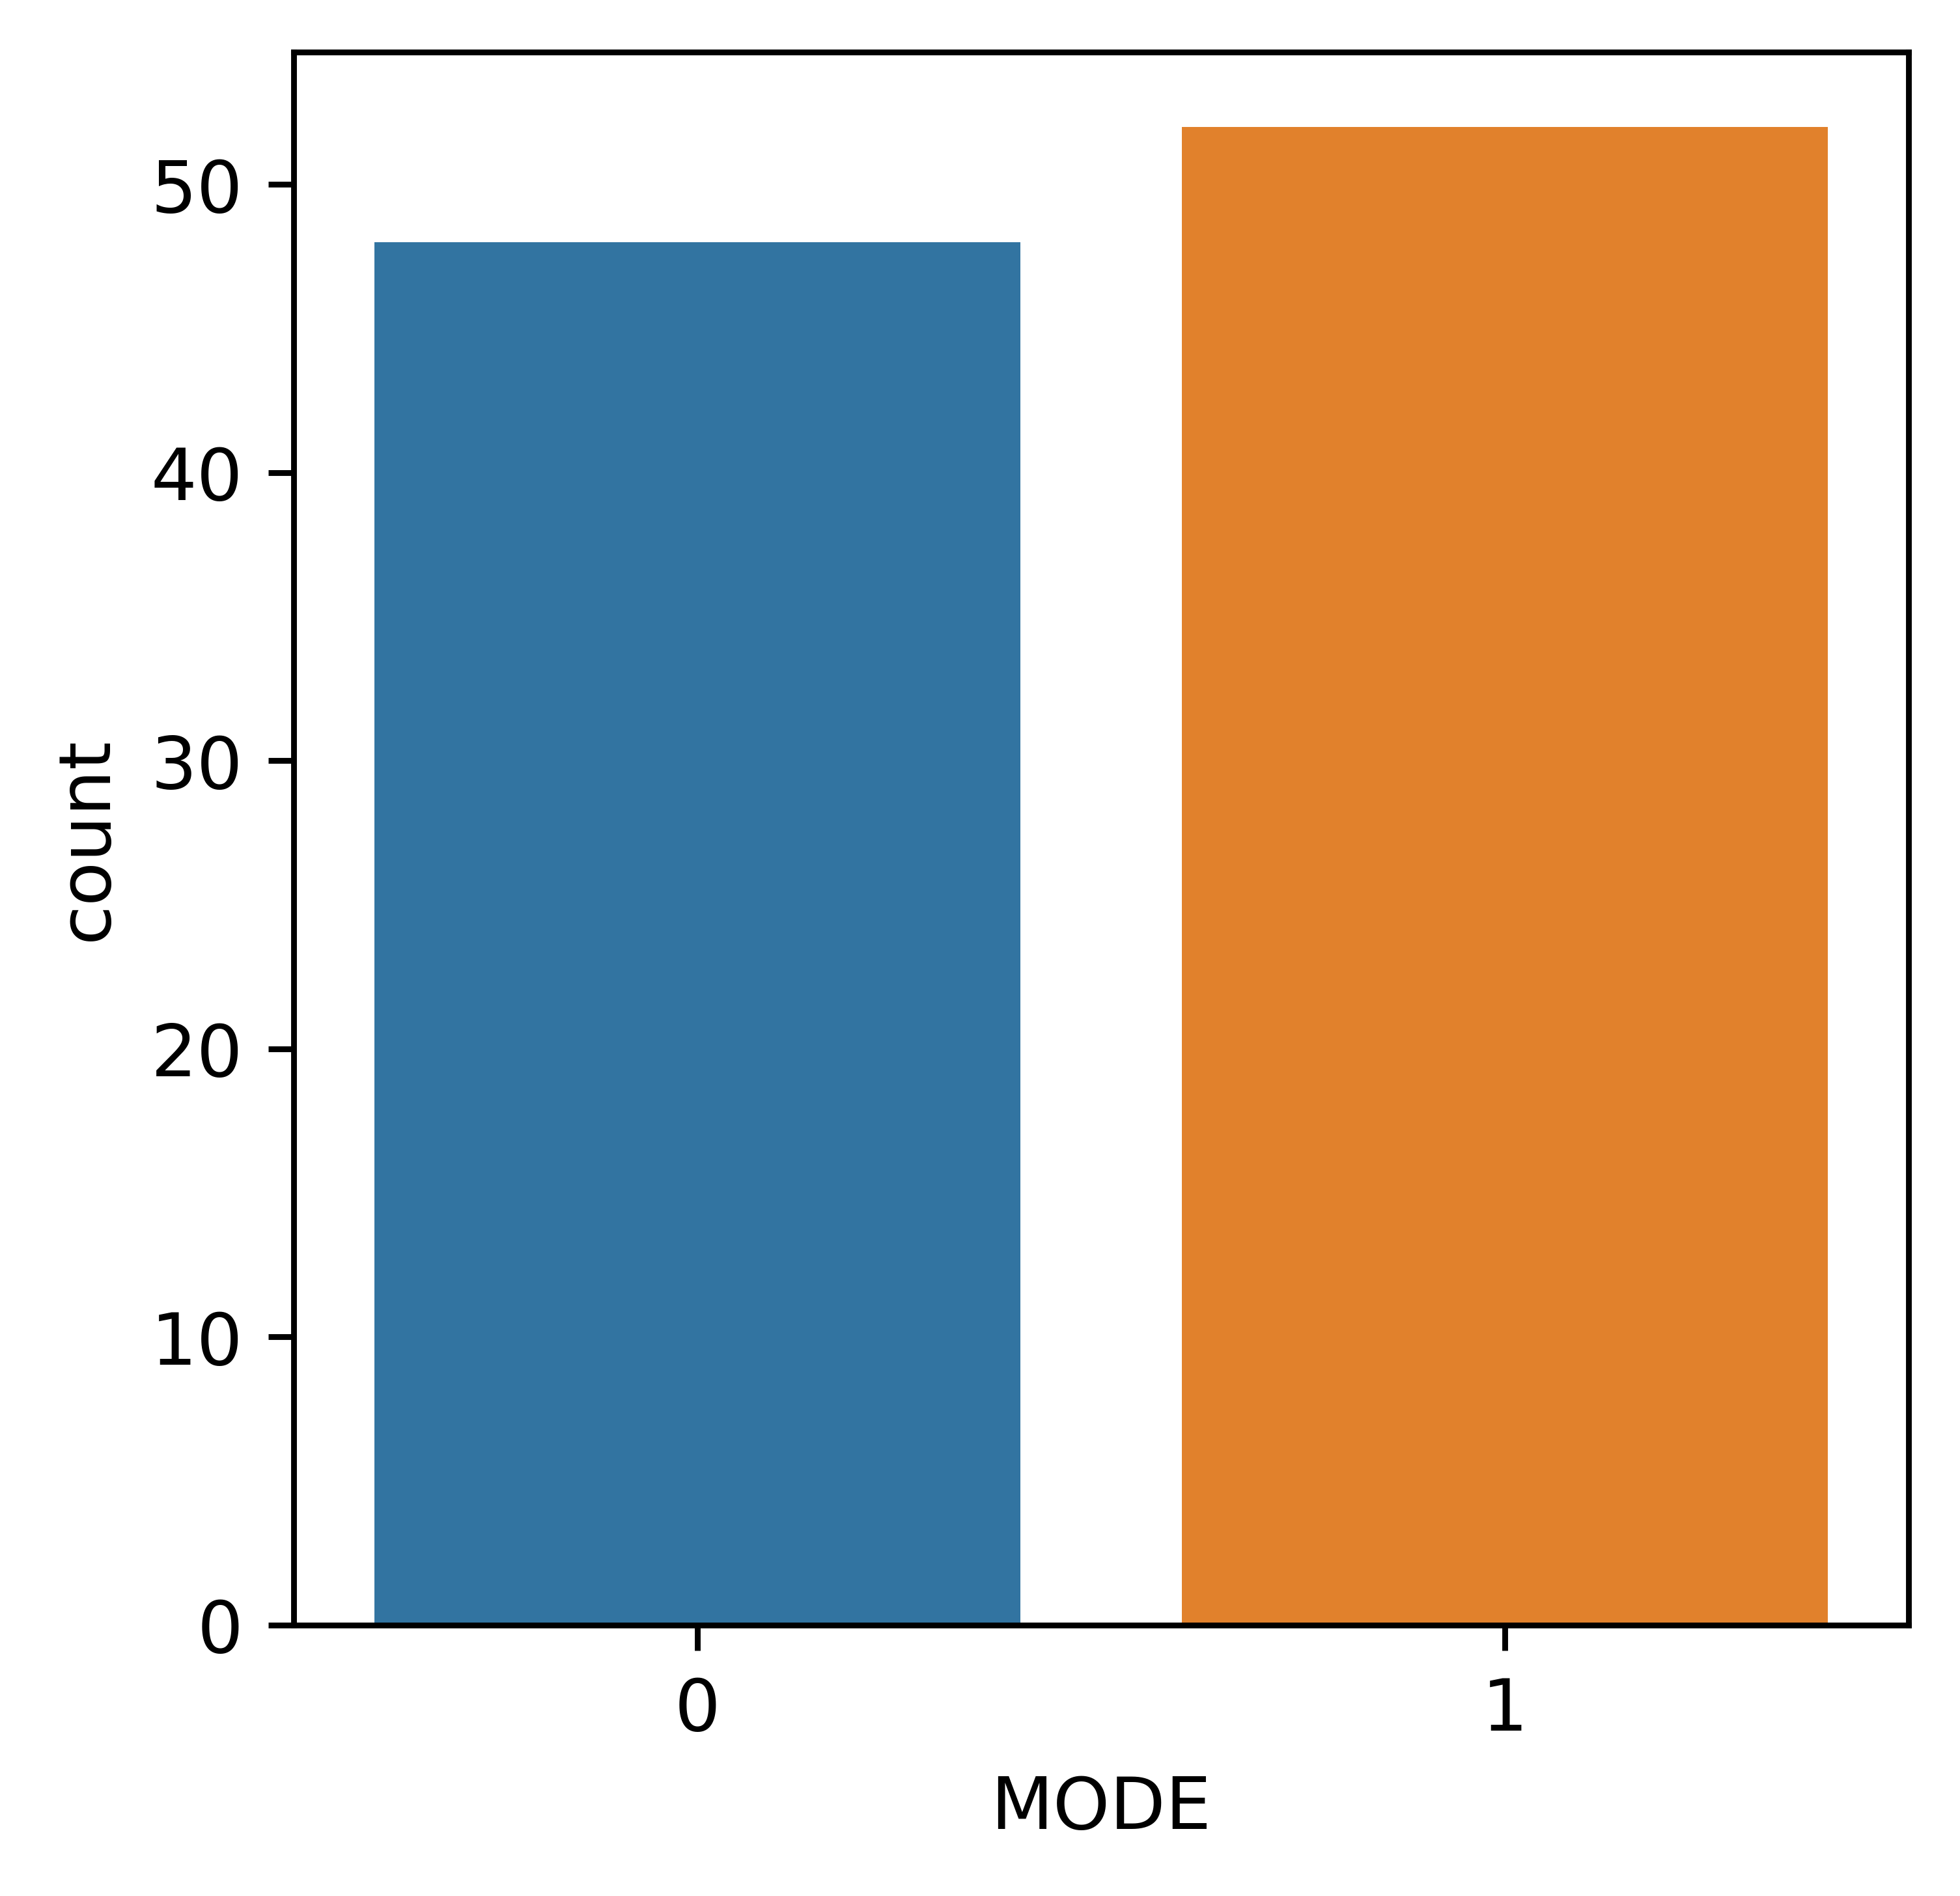

In [34]:
plt.figure(figsize=(4,4),dpi=800)
sns.countplot(x='MODE',data=data1)

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7)

lr.fit(xtr, ytr)

M:\ANACONDA\SETUP\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=7)

In [36]:
lr.predict(xte)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [37]:
lr.score(xtr,ytr)

0.875

In [38]:
lr.score(xte,yte)

0.9

In [39]:
print(accuracy_score(ytr,lr.predict(xtr)))
print(accuracy_score(yte,lr.predict(xte)))

0.875
0.9


In [40]:
print(recall_score(ytr,lr.predict(xtr)))
print(recall_score(yte,lr.predict(xte)))

0.8837209302325582
0.7777777777777778


In [41]:
print(f1_score(ytr,lr.predict(xtr)))
print(f1_score(yte,lr.predict(xte)))

0.8837209302325582
0.8750000000000001


In [42]:
print(precision_score(ytr,lr.predict(xtr)))
print(precision_score(yte,lr.predict(xte)))

0.8837209302325582
1.0


In [43]:
lr.coef_

array([[ 0.03460153, -0.00493564, -0.22278977, -0.14842426]])

In [44]:
# Importing data for prediction
pm=pd.read_csv('PMDT10030.csv')

In [45]:
regm.predict(pm)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
xgb.predict(pm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
pm75=pd.read_csv('PMD75.csv')
pm100=pd.read_csv('PMD100.csv')

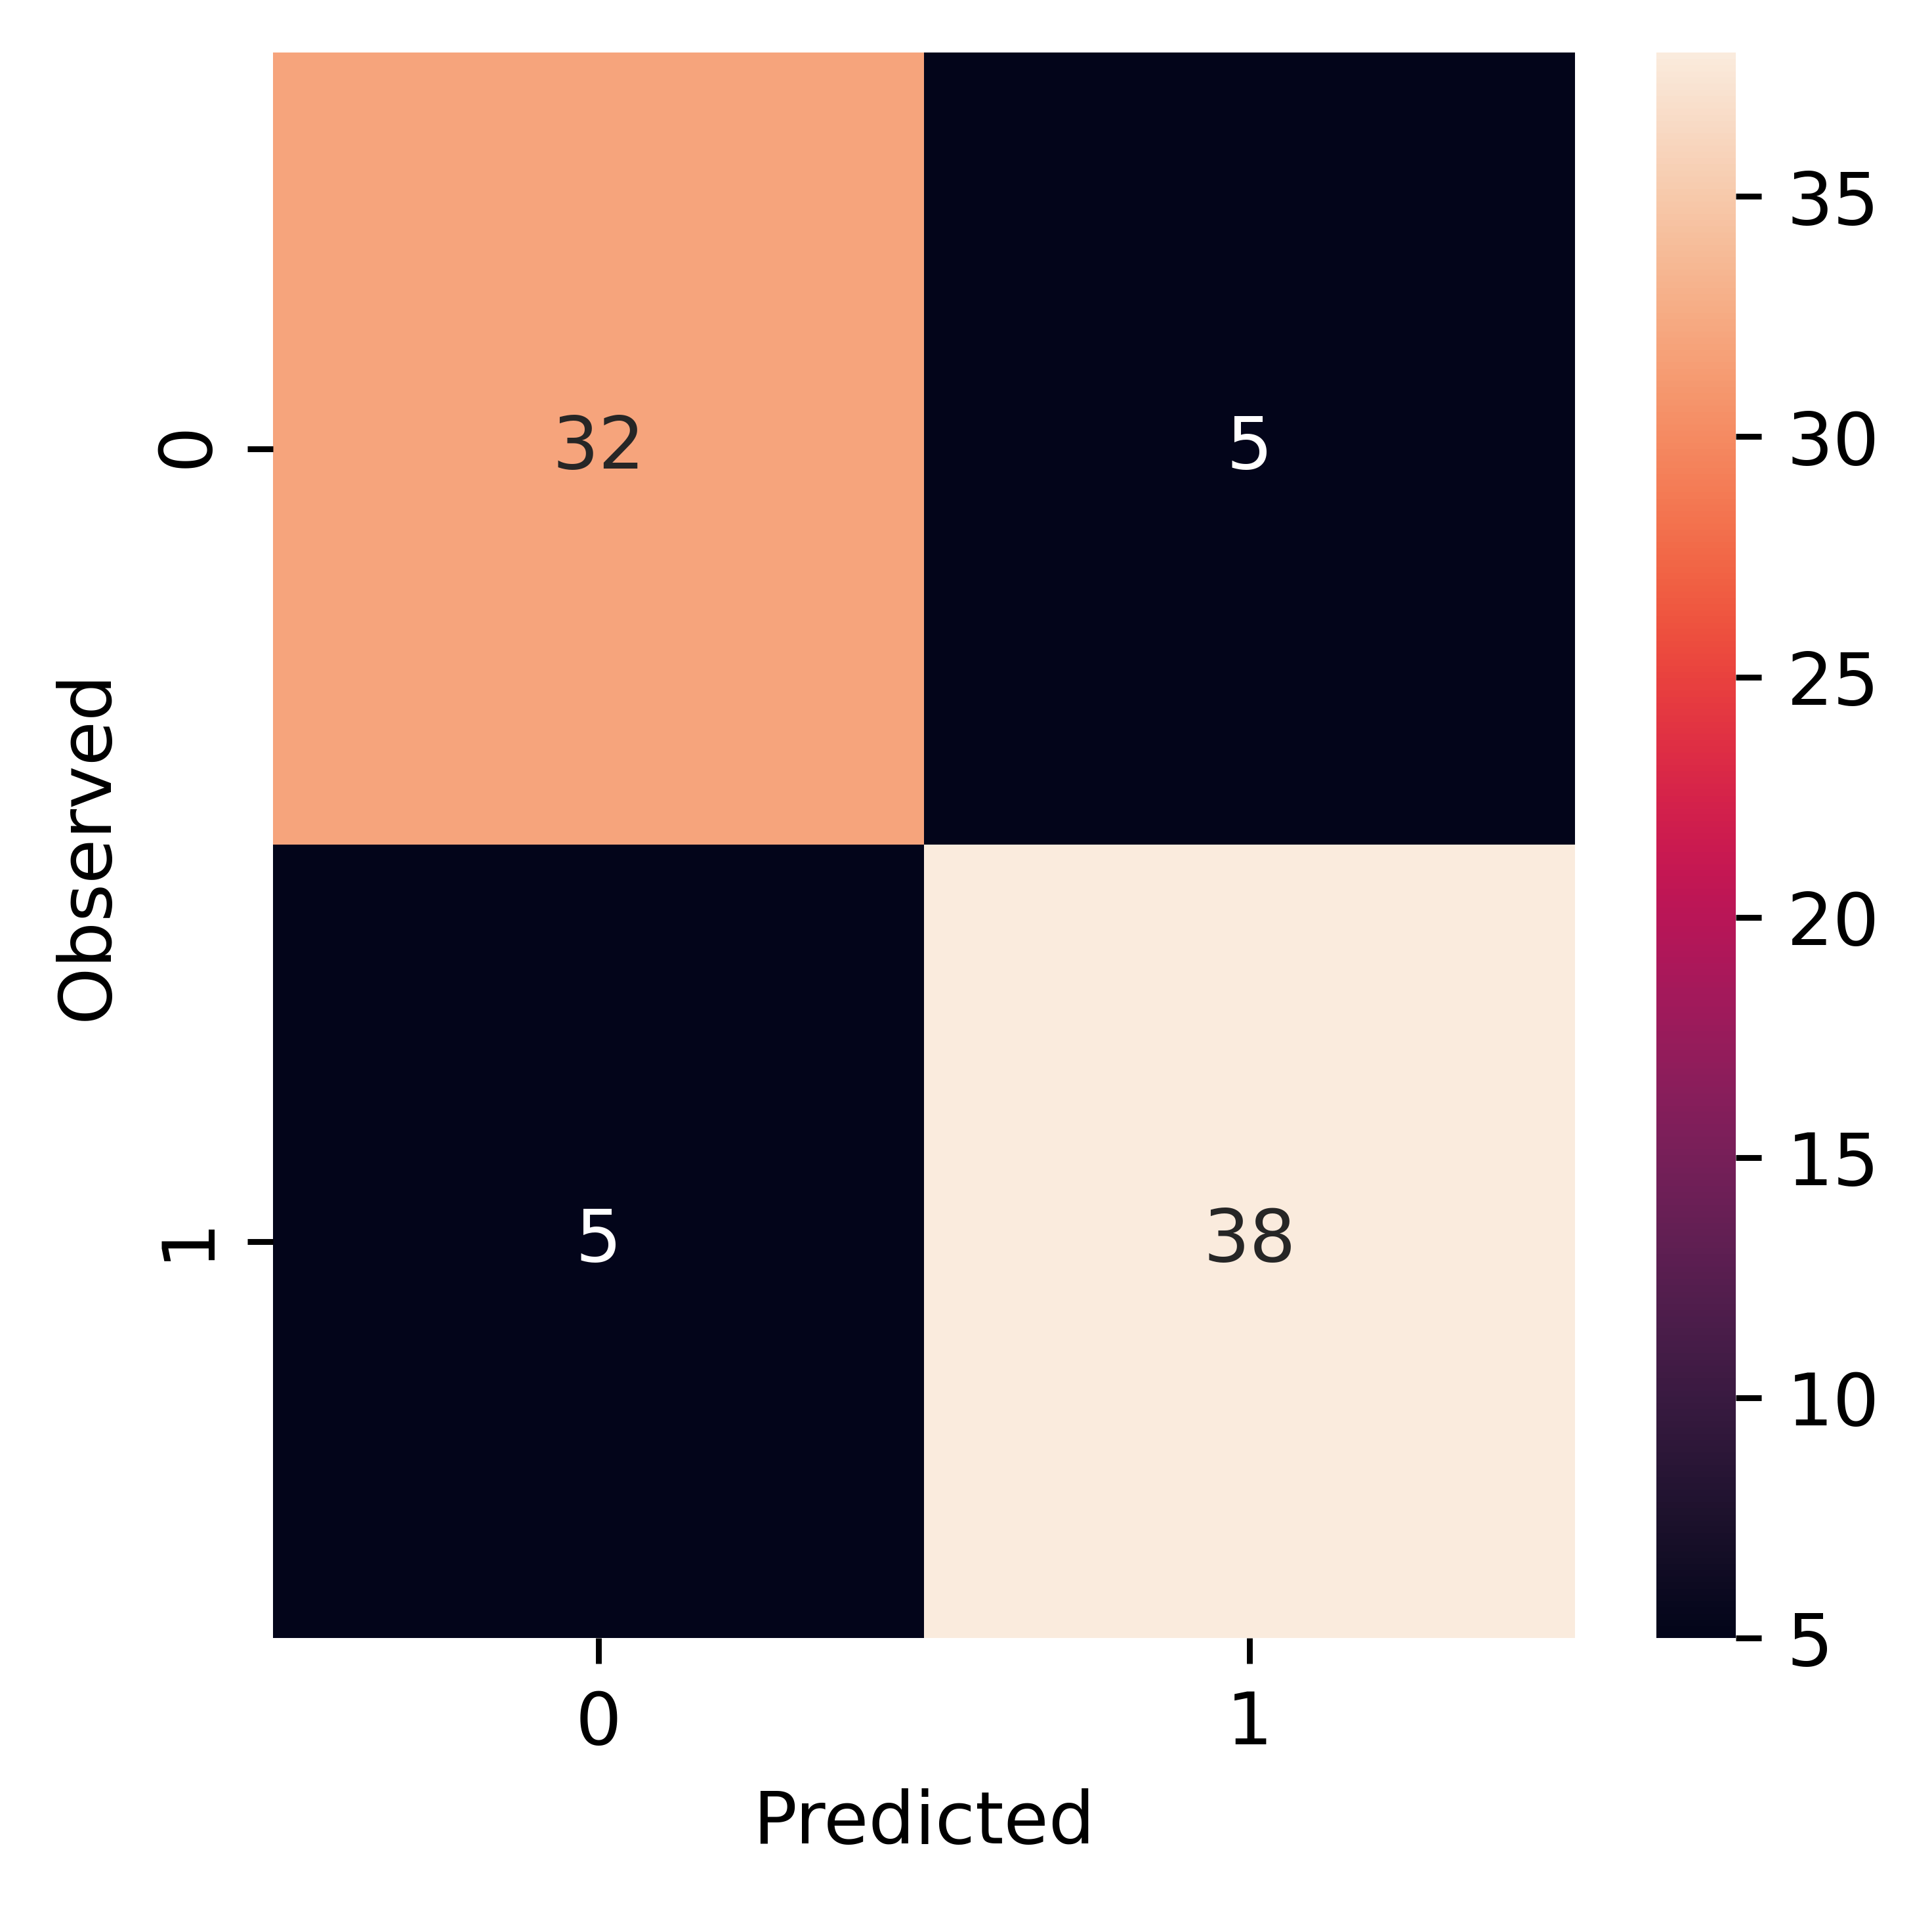

In [48]:
# Confusion Matrix for Logistic Regression Train data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,lr.predict(xtr));

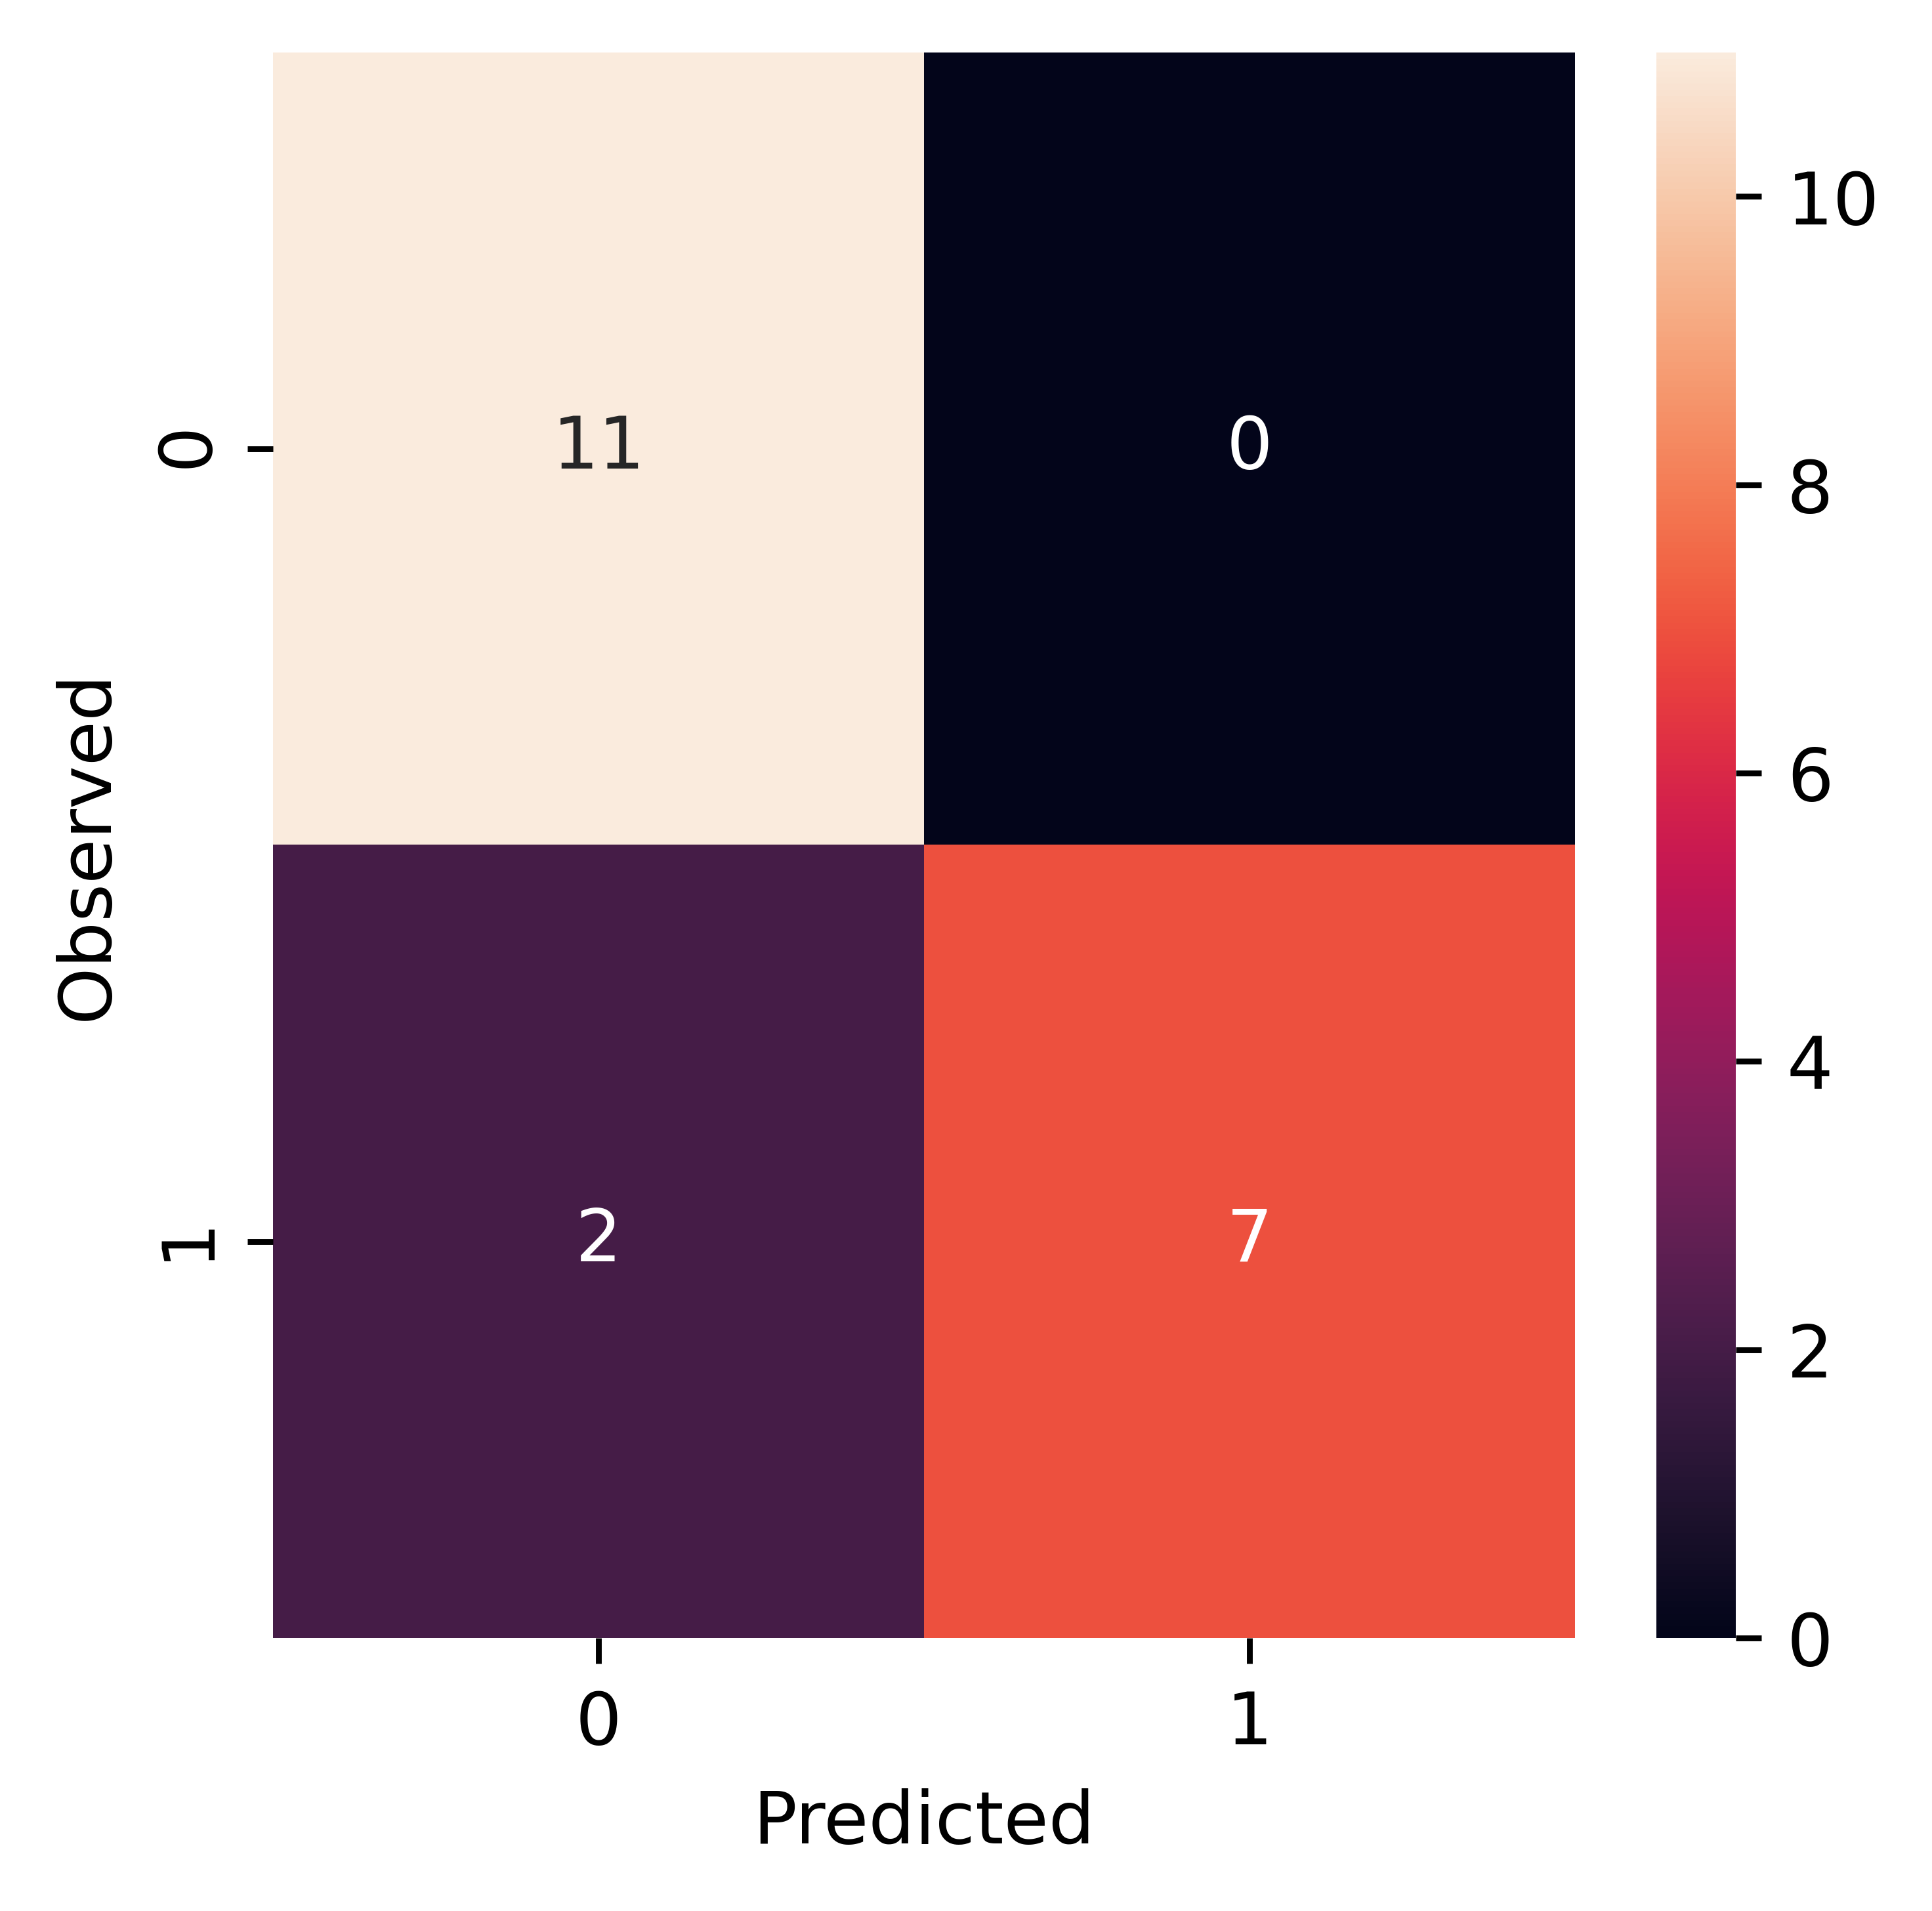

In [49]:
# Confusion Matrix for logistic Regression test data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,lr.predict(xte));

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1, shuffle = True)
import warnings
warnings.filterwarnings('ignore')

In [51]:
results = cross_val_score(regm, xtr, ytr , cv=kfold, scoring='accuracy')

In [52]:
print(results)

[0.6875 0.875  0.9375 0.8125 0.9375]


In [53]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 85.000% (9.354%)


In [54]:
resultsxg = cross_val_score(xgb, xtr, ytr , cv=kfold, scoring='accuracy')

In [55]:
print(resultsxg)
print("Accuracy: %.3f%% (%.3f%%)" % (resultsxg.mean()*100.0, resultsxg.std()*100.0))

[0.6875 0.875  0.8125 0.8125 0.6875]
Accuracy: 77.500% (7.500%)


In [56]:
resultslr = cross_val_score(lr, xtr, ytr , cv=kfold, scoring='accuracy')
print(resultslr)
print("Accuracy: %.3f%% (%.3f%%)" % (resultslr.mean()*100.0, resultslr.std()*100.0))

[0.875  0.9375 0.8125 0.75   0.875 ]
Accuracy: 85.000% (6.374%)


In [57]:
pm=pd.read_csv('PMDT10030.csv')

In [58]:
lr.predict(pm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
resultslr = cross_val_score(regm, x, y , cv=kfold, scoring='accuracy')
print(resultslr)
print("Accuracy: %.3f%% (%.3f%%)" % (resultslr.mean()*100.0, resultslr.std()*100.0))

[0.9  0.9  0.8  0.8  0.85]
Accuracy: 85.000% (4.472%)
